In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras import models,layers


In [2]:
dftrain_raw = pd.read_csv(r'C:\Users\Alienware\Desktop\tensorflow\eat_tensorflow2_in_30_days-master\data\titanic\train.csv')
dftest_raw = pd.read_csv(r'C:\Users\Alienware\Desktop\tensorflow\eat_tensorflow2_in_30_days-master\data\titanic\test.csv')

dftest_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
1,405,0,3,"Oreskovic, Miss. Marija",female,20.00,0,0,315096,8.6625,NaN,S
2,635,0,3,"Skoog, Miss. Mabel",female,9.00,3,2,347088,27.9000,NaN,S
3,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00,1,0,PC 17757,227.5250,C62 C64,C
4,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
174,650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.00,0,0,CA. 2314,7.5500,NaN,S
175,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S
176,577,1,2,"Garside, Miss. Ethel",female,34.00,0,0,243880,13.0000,NaN,S
177,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S


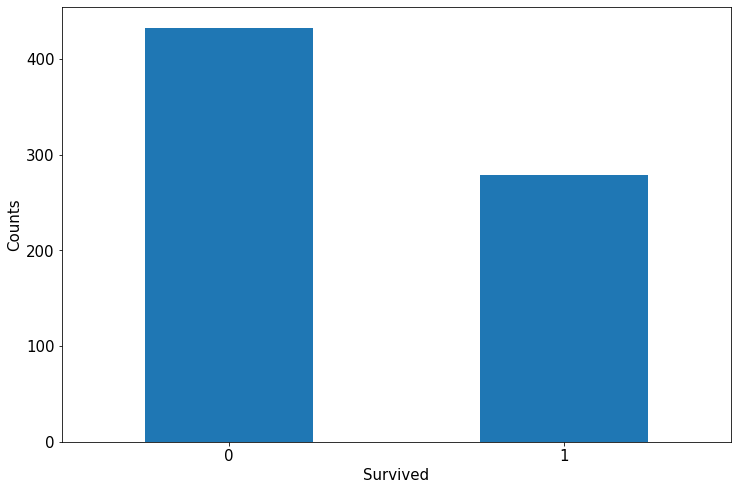

In [28]:
ax = dftrain_raw['Survived'].value_counts().plot(kind = 'bar',figsize = (12,8)
                                               ,fontsize = 15, rot = 0 )
ax.set_ylabel('Counts', fontsize = 15)
ax.set_xlabel('Survived', fontsize = 15)
plt.show()


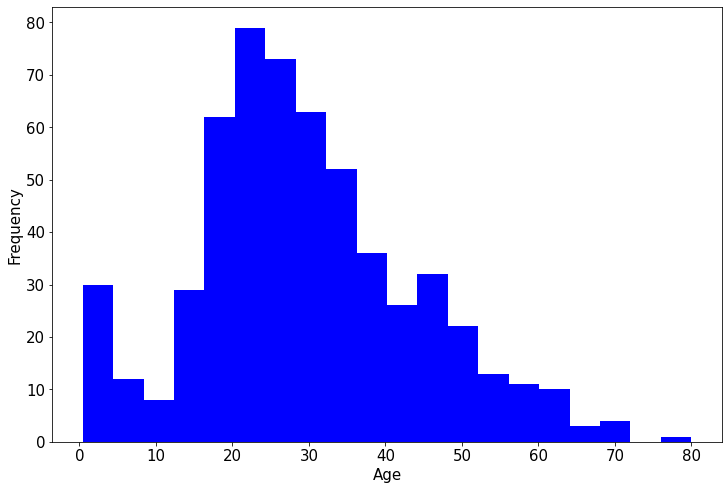

In [36]:
ax = dftrain_raw['Age'].plot(kind = 'hist', bins = 20, color = 'blue',
                            figsize = (12,8), fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)
ax.set_xlabel('Age', fontsize = 15)
plt.show()

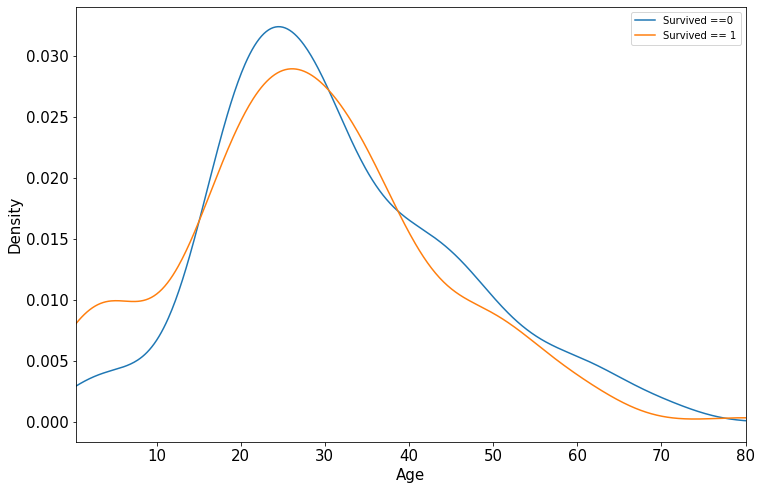

In [48]:
ax = dftrain_raw.query('Survived == 0')['Age'].plot(kind = 'density'
                                                  , figsize = (12,8), fontsize = 15, label = 'Survived ==0')
dftrain_raw.query('Survived == 1')['Age'].plot(kind = 'density', figsize = (12,8),
                                              fontsize = 15, label = 'Survived == 1')
ax.set_ylabel('Density',fontsize = 15)
ax.set_xlabel('Age', fontsize = 15)
plt.xlim(dftrain_raw['Age'].min(),dftrain_raw['Age'].max())

plt.legend()
plt.show()

# preprocessing data

In [76]:
def preprocessing(dfdata):
    dfresult = pd.DataFrame()
    
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_'+str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult,dfPclass], axis = 1)
    
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex], axis = 1)
    
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')
    
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']
    
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')

    dfEmbarked = pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1)    
    
    return(dfresult)
  
    

In [85]:
x_train = preprocessing(dftrain_raw)
y_train = dftrain_raw['Survived'].values

x_test = preprocessing(dftest_raw)
y_test = dftest_raw['Survived'].values

print("x_train.shape =", x_train.shape )
print("x_test.shape =", x_test.shape )

x_train.shape = (712, 15)
x_test.shape = (179, 15)


In [69]:
dfresult = pd.DataFrame()
dfPclass = pd.get_dummies(dftrain_raw['Pclass'])
dfPclass.columns = ['Pclass_'+str(x) for x in dfPclass.columns ]
dfresult = pd.concat([dfresult,dfPclass], axis = 1)

dfSex = pd.get_dummies(dftrain_raw['Sex'])
dfresult = pd.concat([dfresult,dfSex], axis = 1)




,Pclass_1,Pclass_2,Pclass_3,female,male
0,1,0,0,0,1
1,1,0,0,1,0
2,0,1,0,1,0
3,0,1,0,0,1
4,0,0,1,0,1
...,...,...,...,...,...
707,0,0,1,1,0
708,1,0,0,0,1
709,0,0,1,0,1
710,0,1,0,0,1


In [87]:
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(20, activation = 'relu', input_shape = (15,)))
model.add(layers.Dense(10, activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid' ))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                320       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics= ['AUC'])

history = model.fit(x_train,y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2 #分割一部分训练数据用于验证
                   )

Epoch 1/30
9/9 [==============================] - 1s 37ms/step - loss: 0.5306 - auc: 0.8063 - val_loss: 0.5866 - val_auc: 0.7319
Epoch 2/30
9/9 [==============================] - 0s 5ms/step - loss: 0.5274 - auc: 0.8125 - val_loss: 0.5842 - val_auc: 0.7383
Epoch 3/30
9/9 [==============================] - 0s 6ms/step - loss: 0.5083 - auc: 0.8259 - val_loss: 0.5816 - val_auc: 0.7384
Epoch 4/30
9/9 [==============================] - 0s 5ms/step - loss: 0.5047 - auc: 0.8305 - val_loss: 0.5754 - val_auc: 0.7333
Epoch 5/30
9/9 [==============================] - 0s 5ms/step - loss: 0.5012 - auc: 0.8315 - val_loss: 0.5802 - val_auc: 0.7469
Epoch 6/30
9/9 [==============================] - 0s 5ms/step - loss: 0.5039 - auc: 0.8365 - val_loss: 0.5724 - val_auc: 0.7427
Epoch 7/30
9/9 [==============================] - 0s 5ms/step - loss: 0.4932 - auc: 0.8361 - val_loss: 0.5686 - val_auc: 0.7476
Epoch 8/30
9/9 [==============================] - 0s 5ms/step - loss: 0.4882 - auc: 0.8408 - val_loss: 

In [98]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

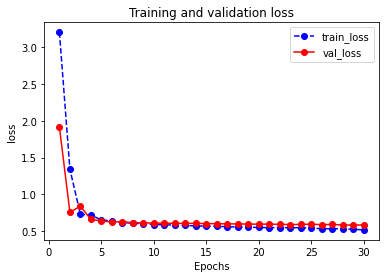

In [92]:
plot_metric(history,"loss")

In [100]:
plot_metric(history,'AUC')

KeyError: 'AUC'

In [101]:
model.evaluate(x = x_test,y = y_test)


6/6 [==============================] - 0s 2ms/step - loss: 0.4355 - auc: 0.8582


[0.4354574680328369, 0.8581691980361938]

In [104]:
model.predict(x_test[0:10])

array([[0.08595225],
       [0.52502406],
       [0.5115973 ],
       [0.97081137],
       [0.71905947],
       [0.72592634],
       [0.09595841],
       [0.91302073],
       [0.52733535],
       [0.12480706]], dtype=float32)

In [103]:
model.predict_classes(x_test[0:10])

AttributeError: 'Sequential' object has no attribute 'predict_classes'